In [1]:
import pandas as pd

Vamos começar com os nossos principais dataframes para analisarmos

In [2]:
df_receita = pd.read_csv('dados/processados/SP/2022/DeputadoFederal/receita_candidato.csv', encoding='latin-1', sep=',')
df_candidato = pd.read_csv('dados/processados/SP/2022/DeputadoFederal/candidato.csv', encoding='latin-1', sep=',')

In [3]:
df_receita.head()

,SQ_CANDIDATO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,VR_RECEITA
0,250001597662,1,OUTROS RECURSOS,10010100,Recursos próprios,1400.00
1,250001597662,1,OUTROS RECURSOS,10010200,Recursos de pessoas físicas,190.00
2,250001597662,1,OUTROS RECURSOS,10020000,Recursos de partido político,1241.53
3,250001597662,1,OUTROS RECURSOS,10020500,Recursos de Financiamento Coletivo,20.00
4,250001597663,1,OUTROS RECURSOS,10010200,Recursos de pessoas físicas,5712.50


In [4]:
df_receita = df_receita[df_receita['VR_RECEITA']>0]

In [5]:
df_candidato.head()

,CD_CARGO,SQ_CANDIDATO,NM_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,...,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,ST_SUBSTITUIDO,SQ_SUBSTITUIDO,SQ_ORDEM_SUPLENCIA,DT_ACEITE_CANDIDATURA
0,7,250001721356,ROSIMEIRE SANTOS CESCHINI,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,36,AGIR,...,DEFERIDO,SIM,Válido,2,Deferido,S,N,-1,-1,15/08/2022 14:10:02
1,7,250001610506,MARIA APARECIDA BORGES DE MACEDO,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,19,PODE,...,DEFERIDO,SIM,Válido,2,Deferido,S,N,-1,84,08/08/2022 15:28:51
2,6,250001643887,DANIEL DE ANDRADE VIEIRA,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,20,PSC,...,DEFERIDO,SIM,Válido,2,Deferido,S,N,-1,20,11/08/2022 20:10:01
3,7,250001642213,ALEIXO ANDRE MANOEL NETO,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,35,PMB,...,DEFERIDO,SIM,Válido,2,Deferido,S,N,-1,-1,11/08/2022 19:35:05
4,6,250001597671,ADRIANA MIGUEL VENTURA,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,30,NOVO,...,DEFERIDO,SIM,Válido,2,Deferido,S,N,-1,-1,28/07/2022 17:05:52


Para a tabela candidatos vamos escolher as colunas mais importantes e depois uniremos as duas tabelas

In [6]:
df_candidato.columns

Index(['CD_CARGO', 'SQ_CANDIDATO', 'NM_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'NR_IDADE_DATA_POSSE', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA',
       'CD_OCUPACAO', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
       'CD_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_PLEITO',
       'CD_SITUACAO_CANDIDATO_URNA', 'DS_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA', 'NM_TIPO_DESTINACAO_VOTOS',
       'CD_SITUACAO_CANDIDATO_TOT', 'D

In [7]:
df_candidato = df_candidato[['SQ_CANDIDATO', 'SG_PARTIDO', 'SG_FEDERACAO', 'DS_GENERO', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA']]
df_candidato = pd.merge(df_candidato, df_receita, on='SQ_CANDIDATO')

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
def formatar_coluna(df, coluna):
    df[coluna] = df[coluna].map('{:,.2f}'.format).str.replace(',', 'X').str.replace('.', ',').str.replace('X', '.')

In [10]:
df_candidato_receita = df_candidato.groupby(['SQ_CANDIDATO', 'SG_PARTIDO']).agg(
    {'VR_RECEITA': 'sum'}
)

# Ordenar pelo total de receita em ordem decrescente
df_candidato_receita = df_candidato_receita.sort_values(['VR_RECEITA'], ascending=False)

df_candidato_receita

,,VR_RECEITA
SQ_CANDIDATO,SG_PARTIDO,
250001612102,CIDADANIA,3789999.99
250001610258,PODE,3313917.40
250001610668,PT,3281293.48
250001612132,PSDB,3221072.53
250001612092,PSDB,3188141.60
...,...,...
250001612125,PSDB,100.00
250001677887,PROS,90.96
250001677899,PROS,90.95


In [11]:
df_partido_receita = df_candidato_receita.reset_index().groupby(['SG_PARTIDO']).agg(
    {'VR_RECEITA': ['sum', 'var'], 'SQ_CANDIDATO': 'nunique'}
)

# Renomear as colunas para facilitar o acesso posterior
df_partido_receita.columns = ['VR_RECEITA_SUM', 'VR_RECEITA_VAR', 'N_CANDIDATOS']

# Ordenar pelo total de receita em ordem decrescente
df_partido_receita = df_partido_receita.sort_values(['SG_PARTIDO'], ascending=False)

df_partido_receita

,VR_RECEITA_SUM,VR_RECEITA_VAR,N_CANDIDATOS
SG_PARTIDO,,,
UP,44463.34,NaN,1
UNIÃO,78301101.95,984852629743.57,66
SOLIDARIEDADE,15841759.88,228199264989.94,54
REPUBLICANOS,35207413.18,663828458106.36,69
REDE,5568039.52,434273915723.32,21
PV,5784012.09,470214280416.24,11
PTB,9868181.46,205663892256.94,71
PT,50267584.65,851364291198.29,56
PSTU,207652.37,791848714.18,9


# Histograma

<Axes: >

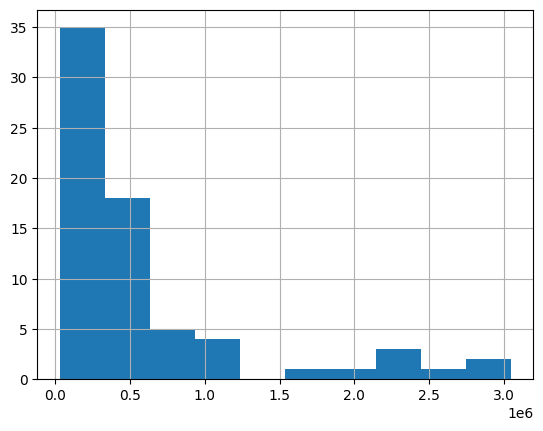

In [12]:
df_candidato_receita = df_candidato.groupby(['SQ_CANDIDATO', 'SG_PARTIDO']).agg(
    {'VR_RECEITA': 'sum'}
)

# Ordenar pelo total de receita em ordem decrescente
df_candidato_receita = df_candidato_receita.sort_values(['VR_RECEITA'], ascending=False)

df_candidato_receita[df_candidato_receita['VR_RECEITA']>0]

df_candidato_receita = df_candidato_receita.reset_index()

df_candidato_receita[df_candidato_receita['SG_PARTIDO']=='PL']['VR_RECEITA'].hist()


Aplicando tecnicas de normalização

<Axes: xlabel='VR_RECEITA_log', ylabel='Count'>

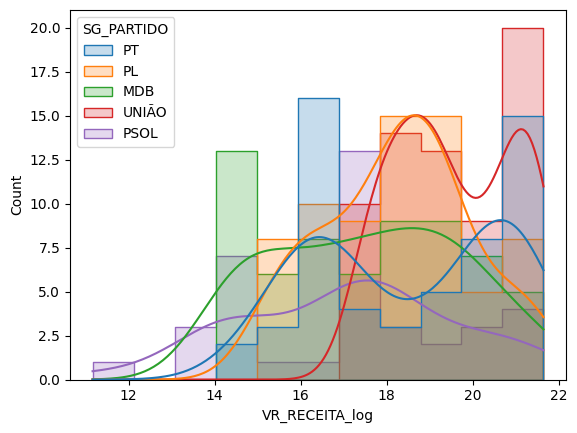

In [13]:
import numpy as np
import seaborn as sns

df_candidato_receita['VR_RECEITA_log'] = np.log2(df_candidato_receita['VR_RECEITA']+1)
df_candidato_receita = df_candidato_receita[df_candidato_receita['SG_PARTIDO'].isin(['PL', 'PT', 'UNIÃO', 'MDB', 'PSOL'])]

sns.histplot(data=df_candidato_receita, x='VR_RECEITA_log', hue='SG_PARTIDO', fill=True, element='step', kde=True)

# Relacionando com os votos

In [14]:
df_votos = pd.read_csv('dados/processados/SP/2022/DeputadoFederal/votacao_candidato.csv', encoding='latin-1', sep=',')
df_votos.head()

,SQ_CANDIDATO,NM_VOTAVEL,QT_VOTOS
0,250001597662,TONY VINICIUS DE OLIVEIRA,536
1,250001597663,RENATO MOTTA BICUDO GUIMARÃES E SILVA,497
2,250001597664,CESAR MAX DE LIMA VIEIRA,622
3,250001597665,THIAGO IMBERNOM,863
4,250001597666,HELCIO FREIRE DO CARMO,641


In [18]:
df_voto_receita = pd.merge(df_candidato_receita, df_votos, on='SQ_CANDIDATO')

<Axes: xlabel='VR_RECEITA', ylabel='QT_VOTOS'>

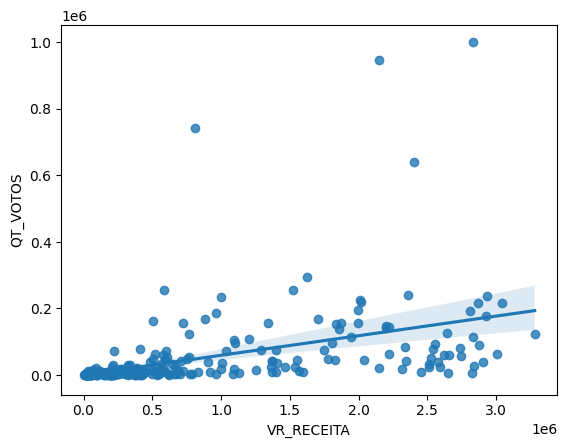

In [32]:
sns.regplot(data=df_voto_receita, y="QT_VOTOS", x="VR_RECEITA")

In [28]:
df_voto_receita.sort_values('QT_VOTOS', ascending=False).head(10)

,SQ_CANDIDATO,SG_PARTIDO,VR_RECEITA,VR_RECEITA_log,NM_VOTAVEL,QT_VOTOS,QT_VOTOS_log
10,250001613761,PSOL,2829243.22,21.43,GUILHERME CASTRO BOULOS,1001472,19.93
37,250001611365,PL,2146899.69,21.03,CARLA ZAMBELLI SALGADO DE OLIVEIRA,946244,19.85
85,250001611374,PL,807241.63,19.62,EDUARDO NANTES BOLSONARO,741701,19.50
27,250001611315,PL,2401140.63,21.20,RICARDO DE AQUINO SALLES,640918,19.29
52,250001602048,UNIÃO,1625249.99,20.63,KIM PATROCA KATAGUIRI,295460,18.17
57,250001613814,PSOL,1520936.59,20.54,ERIKA SANTOS SILVA,256903,17.97
106,250001611227,MDB,585331.00,19.16,MARIO PALUMBO JUNIOR,254898,17.96
28,250001611359,PL,2356995.63,21.17,GUILHERME MURARO DERRITE,239772,17.87
3,250001611251,MDB,2933000.00,21.48,LUIZ FELIPE BALEIA TENUTO ROSSI,236463,17.85
78,250001611254,MDB,1000000.00,19.93,FÁBIO EDUARDO DE OLIVEIRA TERUEL,235165,17.84


<Axes: xlabel='VR_RECEITA', ylabel='QT_VOTOS'>

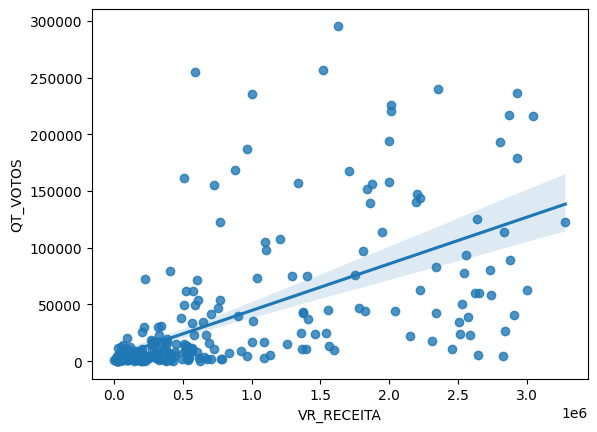

In [34]:
filtro_sq = [250001613761, 250001611365, 250001611374, 250001611315]

df_filtro = df_voto_receita[~df_voto_receita['SQ_CANDIDATO'].isin(filtro_sq)]

sns.regplot(data=df_filtro, y="QT_VOTOS", x="VR_RECEITA")

<Axes: xlabel='VR_RECEITA_log', ylabel='QT_VOTOS_log'>

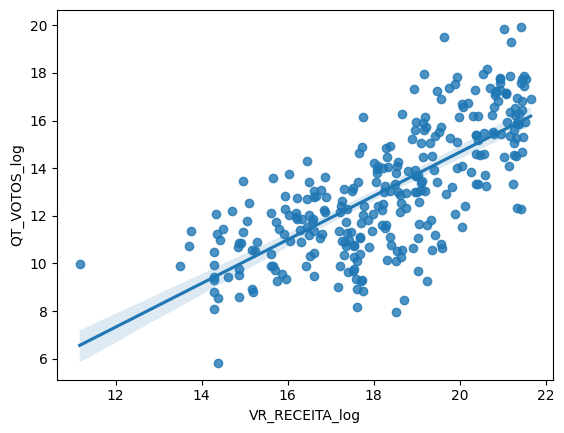

In [33]:
df_voto_receita['QT_VOTOS_log'] = np.log2(df_voto_receita['QT_VOTOS']+1)
sns.regplot(data=df_voto_receita, y="QT_VOTOS_log", x="VR_RECEITA_log")

In [38]:
corr1 = df_voto_receita['QT_VOTOS'].corr(df_voto_receita['VR_RECEITA'])
corr2 = df_filtro['QT_VOTOS'].corr(df_filtro['VR_RECEITA'])
corr3 = df_voto_receita['QT_VOTOS_log'].corr(df_voto_receita['VR_RECEITA_log'])

In [42]:
print("O Valor da correlação aplicado aos dados sem alteração é de: {}".format(corr1))
print("O Valor da correlação aplicado aos dados filtrando os votos outliers é de: {}".format(corr2))
print("O Valor da correlação aplicado aos dados aplicando uma transformação logé de: {}".format(corr3))

O Valor da correlação aplicado aos dados sem alteração é de: 0.4652274203908484
O Valor da correlação aplicado aos dados filtrando os votos outliers é de: 0.6135355667845139
O Valor da correlação aplicado aos dados aplicando uma transformação logé de: 0.7276853552689276


# Perfil dos financiamentos